<ul>
    <li><b>Clustering</b> is a machine learning technique that uses unsupervised learning.</li>
    <li> Group unlabelled data into natural clusters </li>
    <li> Clustering is an optimization problem </li>
    <li> $variability(c) = \sum_{e \in c} distance(mean(c), e)^2$</li>
    <li> Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad. </li>
    <li>$dissimilarity(C) = \sum_{c \in C}variability(c)$</li>
    <li> Find a C that minimises dissimilarity</li>
    <li> In order for this not to end up as each point being a cluster we add a constraint e.g. the clusters have to have some minimum distance between them or constrain the number of clusters</li>
    </ul>

<ul>
    <li><b>Hieracrhical Clustering </b></li>
    <li> Start by assigning each item to a cluster so that if you have N items you now have N clusters, each containing just one item</li>
    <li>Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one fewer clusters</li>
    <li>Continue until all items are clustered into a single cluster of size N</li>
    <li> Agglomerative hierarchical clustering </li>
    <li> What do we mean by closest?</li>
    <li> Can get different clusters depending linkage metric we use </li>
    <li> <b>Single Linkage:</b> consider the distance between one clsuter and another cluster to be equal to the shortest distance from any member of one cluster to any member of another cluster</li>
    <li><b>Complete linkage</b>: consider the distance between one cluster and another cluster to be equal to the greatest distance from any member of one cluster to any member of the other cluster</li>
    <li><b>Average linkage</b>: consider the distance between one cluster and another cluster to be te average distance from any member of one cluster to any member of the other cluster</li>
    <ul>
    

<table style="width:50%">
<tr>
    <th>BOS</th>    
    <th>NY</th>
    <th>CHI</th>
    <th>DEN</th>
    <th>SF</th>
    <th>SEA</th>
</tr>
<tr>
    <th>0</th>    
    <th>206</th>
    <th>963</th>
    <th>1949</th>
    <th>3095</th>
    <th>2979</th>
</tr>
    <tr>
    <th>0</th>    
    <th>0</th>
    <th>802</th>
    <th>1771</th>
    <th>2934</th>
    <th>2815</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>966</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>808</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
</tr>

</table>

Cluster airports based on their distance.

<b>Clusters</b>
<ul>
    <li> [BOS, NY] [CHI] [DEN] [SF] [SEA] </li>
    <li> [BOS, NY, CHI] [DEN] [SF] [SEA] </li>
    <li> [BOS, NY, CHI] [DEN] [SF, SEA] </li>
    <li> <b>Single</b>[BOS, NY, CHI, DEN] [SF, SEA] </li>
    <li> <b>Complete</b>[BOS, NY, CHI] [DEN, SF, SEA] </li>
</ul>

<b> Pros and cons of hierarchical clustering</b>
<ul>
    <li>Get a history of dendrograms</li>
    <li>Deterministic given a linkage metric</li>
    <li> Answer might not be optimal. Greedy algorithm. Making locally optimal decisions at each point may or may not give us a globally optimal solution</li>
    <li> Flexible</li>
    <li> Really slow, complexity $O(n^3)$. Not something you want to work with on large datasets</li>
</ul>

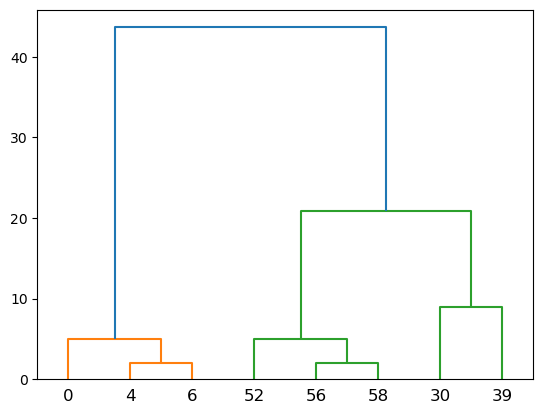

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = [0, 4, 6, 30, 39, 52, 56, 58]
Z = np.reshape(data,(len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(Z, method='average'), labels=data)


In [3]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979], 
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 2142, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 2142, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]

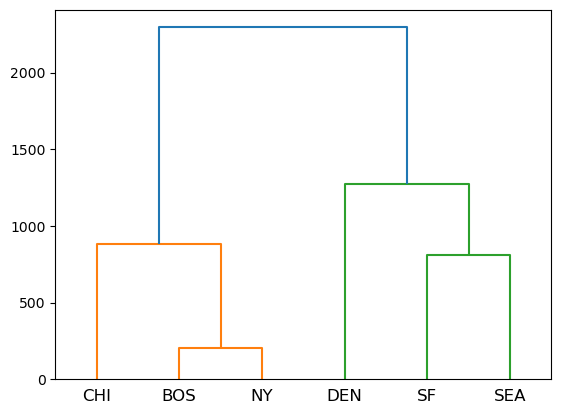

In [4]:
from scipy.spatial.distance import squareform
condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='average'), labels=airports)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [6]:
dataset = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [7]:
points = dataset[0]

In [8]:
points


array([[-0.48428125,  6.1339592 ],
       [ 0.11528327, -4.98158692],
       [ 0.09417313, -4.05882797],
       [-7.556685  , -2.42379349],
       [ 0.59860361,  3.34704241],
       [-4.73695683, -1.23390307],
       [-1.88583355, -0.65794471],
       [-1.25918778,  8.42166447],
       [-5.46469501, -1.4677575 ],
       [-5.21118763, -0.88454091],
       [-2.39128542,  9.5902579 ],
       [-3.79577694, -3.94197151],
       [-0.55798628, -2.70088621],
       [-2.84694071, 11.70447814],
       [-5.88958899, -1.47219541],
       [-0.4497762 ,  4.58102297],
       [-6.15966811, -2.13553844],
       [-0.10009538,  8.99929345],
       [-2.15963524, -7.56230415],
       [-3.51874239, -4.48330466],
       [-1.32101631, 10.72186833],
       [ 5.19455346, -3.85790517],
       [ 1.00681205, -5.97364221],
       [-1.16539558,  7.39086886],
       [-3.25968528,  5.44630828],
       [-5.39405829,  0.12384806],
       [-3.87922543,  9.49845046],
       [-2.31431452,  9.98631399],
       [-1.92013725,

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

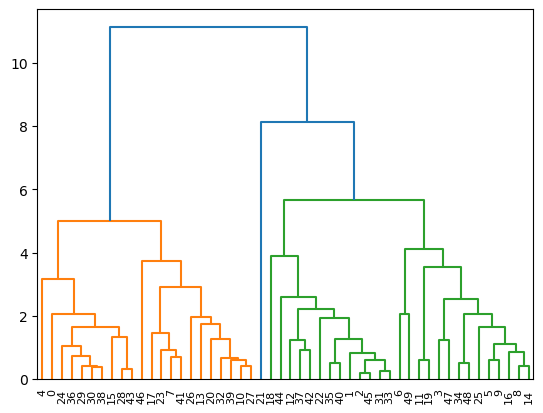

In [10]:
dendrogram = sch.dendrogram(sch.linkage(points, method='average'))

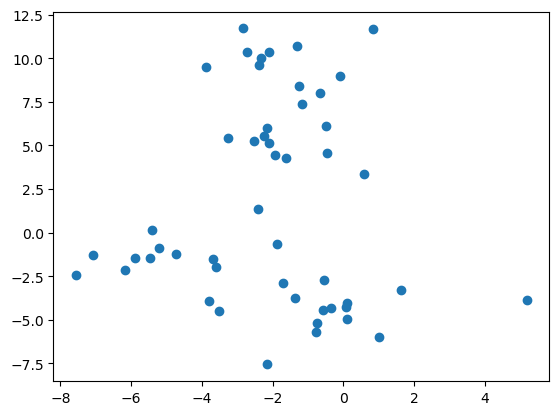

In [11]:
plt.scatter(dataset[0][:, 0], dataset[0][:,1])

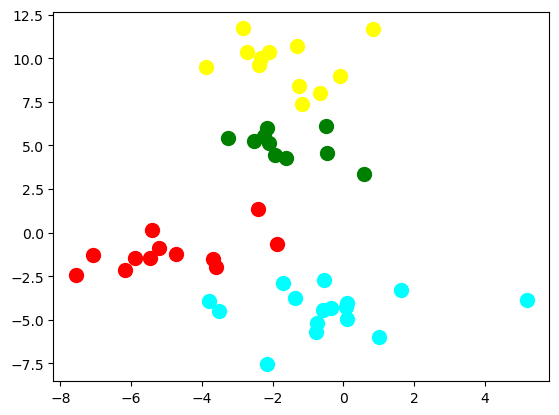

In [12]:
hc = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc==0,0], points[y_hc==0,1], s=100, c='cyan')
plt.scatter(points[y_hc==1,0], points[y_hc==1,1], s=100, c='yellow')
plt.scatter(points[y_hc==2,0], points[y_hc==2,1], s=100, c='red')
plt.scatter(points[y_hc==3,0], points[y_hc==3,1], s=100, c='green')

In [13]:
import pandas as pd
loan_data = pd.read_csv("loan_data3.csv")
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
percent_missing = round(100*(loan_data.isnull().sum())/len(loan_data), 2)

In [16]:
percent_missing

credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

In [17]:
cleaned_data = loan_data.drop(['purpose', 'not_fully_paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   int_rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log_annual_inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days_with_cr_line  9578 non-null   float64
 7   revol_bal          9578 non-null   int64  
 8   revol_util         9578 non-null   float64
 9   inq_last_6mths     9578 non-null   int64  
 10  delinq_2yrs        9578 non-null   int64  
 11  pub_rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [18]:
import seaborn as sb
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sb.boxplot(data=df, orient='v')
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')

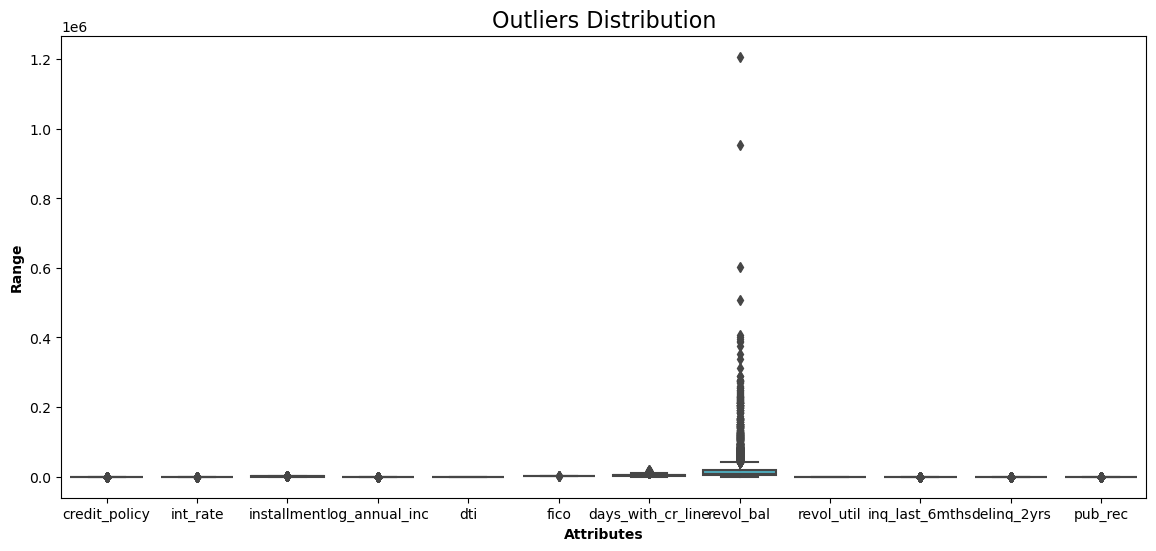

In [19]:
show_boxplot(cleaned_data)

In [20]:
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.25)
        Q3 = df[str(col)].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
        return df

(7710, 12)

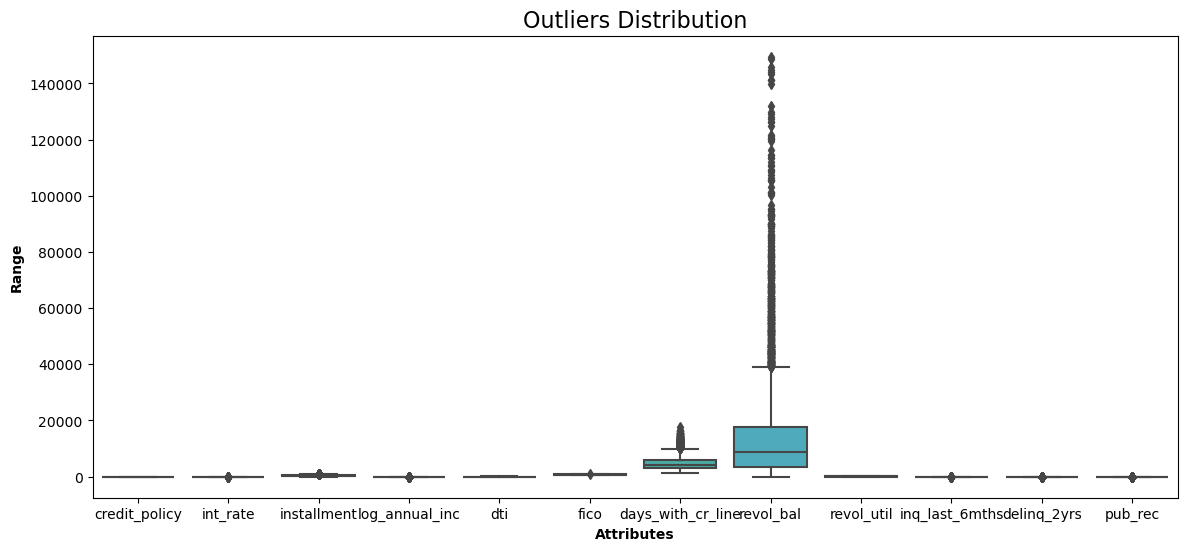

In [21]:
without_outliers = remove_outliers(cleaned_data)
show_boxplot(without_outliers)
without_outliers.shape

In [22]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape
#pruned_data = scaled_data[0:5000]

(7710, 12)

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [24]:
complete_clustering = linkage(scaled_data, method = "complete", metric="euclidean")
average_clustering = linkage(scaled_data, method = "average", metric="euclidean")
single_clustering = linkage(scaled_data, method = "single", metric="euclidean")

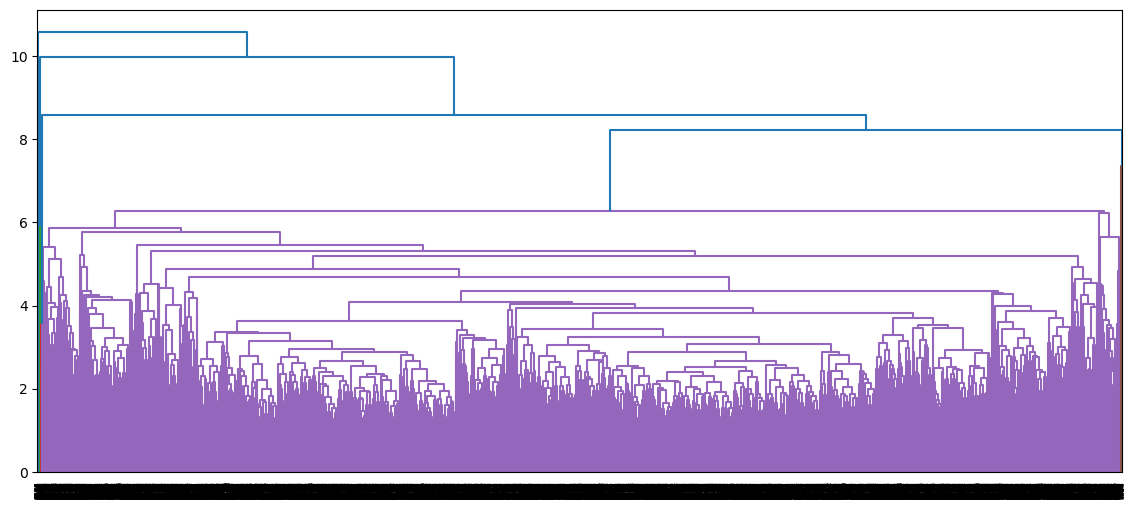

In [25]:
dendrogram(average_clustering)
plt.show()

In [26]:
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1,)
without_outliers["cluster"] = cluster_labels
without_outliers
# pruned_data =pd.DataFrame(pruned_data)


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,cluster
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,0
7706,1,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,0
7707,1,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,0
7708,1,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,0


<Axes: xlabel='cluster', ylabel='fico'>

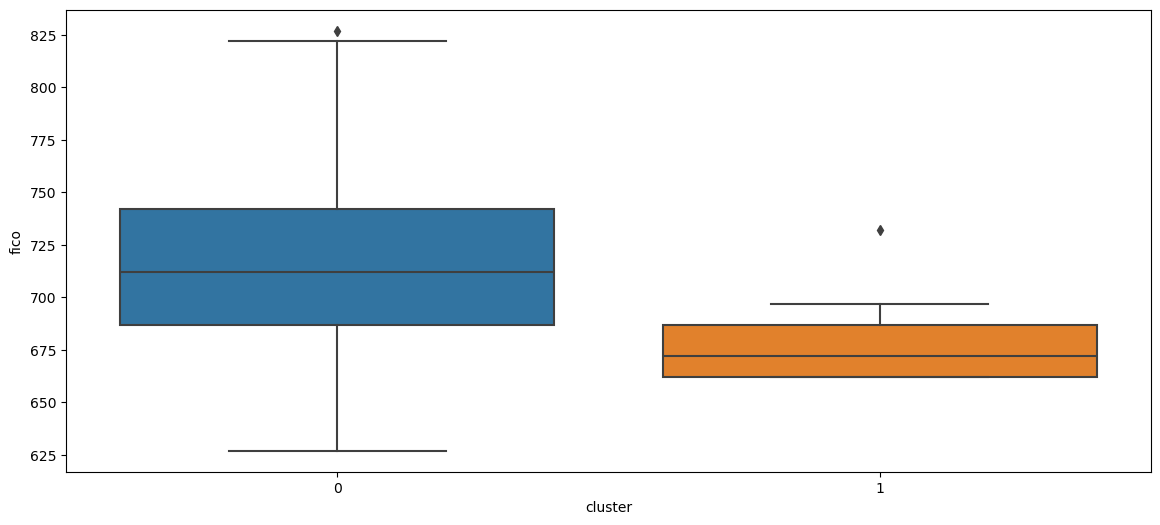

In [27]:
sb.boxplot(x="cluster", y="fico", data=without_outliers)

<b>k-means clustering </b>
<ul>
    <li>k is the number of clusters that you want</li>
    <li> If you don't have any idea about how many clusters there are this is problematic</li>
    <li> If you kow many clusters you want it is a good choice as it is much faster</li>
</ul>

<b> k-means algorithm </b>
<ul> 
    <li>randomly choose k samples as initial centroids </li>
    <li> while True:</li>
    <li> create k clusters by assigned example to the closest centroid</li>
    <li> compute k new centroids by averaging the examples in each cluster</li>
    <li> if centroids don't change</li>
    <li> exit</li>
</ul>
    


<ul>
    <li>Complexity of one iteration</li>
    <li>Compare each point with each centroid k*n</li>
    <li> Typically it converges quite quickly</li>
    <li> Most commonly used clustering algorithm as it is very fast</li>
</ul>

<b> Choosing k </b>
<ul>
    <li> Choosing the wrong k can be problematic</li>
    <li> If k is non-sensical then your clustering will be non-sensical</li>
    <li> How do we choose k?</li>
    <li> Results can depend on the initial centroids</li>
    <li> k-means is non-deterministic</li>
    <li> If initial centroids are poorly chosen can take longer to converge or get a completely different answer</li>
</ul>

<b> Choosing k </b>
<ul>
    <li>Choose k using a priori knowledge of the application</li>
    <li>For example only 5 different types of bacteria </li>
    <li> Two types of people in the world - DkiT graduates and not</li>
    <li> Try different values of k and evaluate the quality of the results</li>
    <li> Run hierarchical clustering on a subset of the data</li>
    <li> Try and select good initial centroids distributed over the space</li>
    <li> Try multiple sets of randomly chosen centroid and select the best result</li>
</ul>

<b> Mitigating dependence on initial centroids </b>
<ul>
    <li>best = kmeans(points)</li>
    <li> for t in range(numTrials):</li>
    <li> C = kmeans(points)</li>
    <li> if dissimilarity(C) < dissimilarity(best) </li>
    <li> best = C</li>
    <li> return best</li>
</ul>

<ul>
    <li> Think of a centroid as the "centre of gravity" of a cluster</li>
</ul>

<b> Elblow method to find k </b>
<ul> 
    <li>$SSE_1 = \sum_{i=0}^ndist(x_i-c_1)^2$</li>
    <li> $SSE = SSE_1 + \dots + SSE_n$</li>
</ul>

In [28]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [29]:
df = pd.read_csv("income.csv")

In [30]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohen,29,61000
3,Ismail,28,60000
4,Kory,42,150000


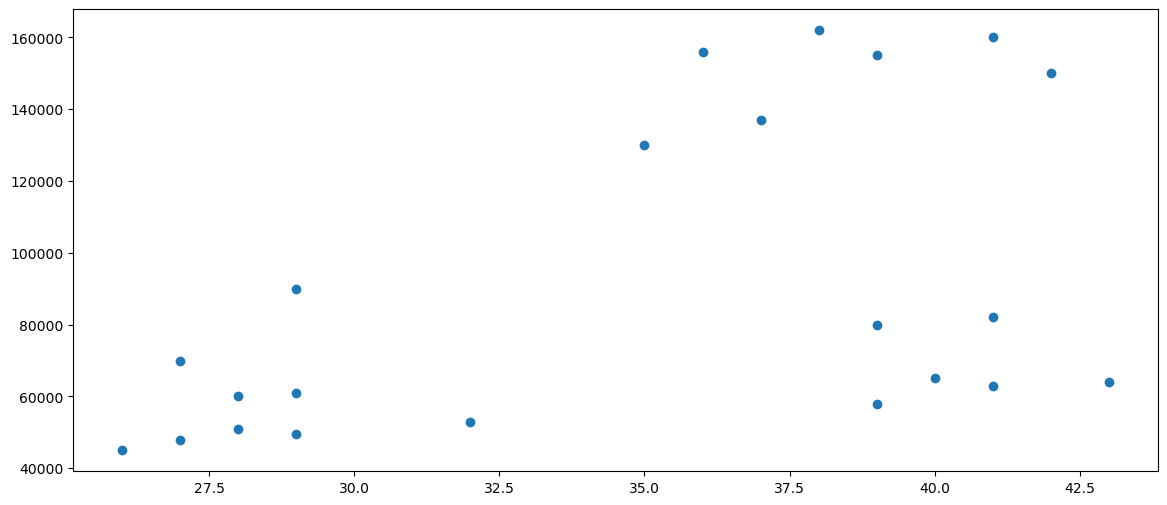

In [31]:
plt.scatter(df['Age'], df['Income'])

In [32]:
km = KMeans(n_clusters=3, n_init='auto')

In [33]:
km

KMeans(n_clusters=3, n_init='auto')

In [34]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [35]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohen,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


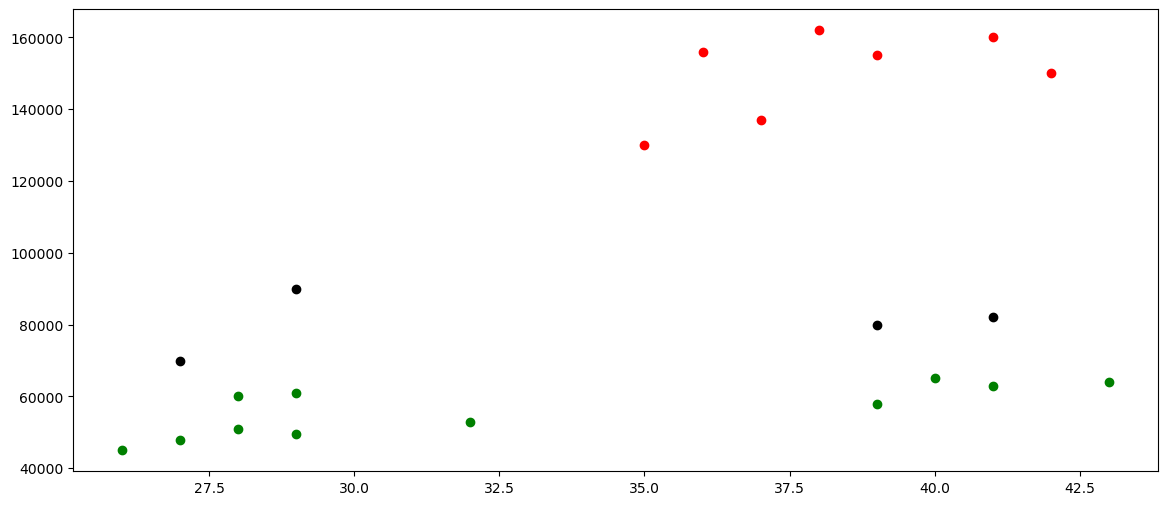

In [36]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]
plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')


<ul>
    <li> Problematic as features are not scaled</li>
    <li> Income 40,000 -> 165,000</li>
    <li> Age 25 - 45</li>
    <li> Income will completely dominate unless scaled. If you don't scale the data you might as well forget about age as the scale for income is 1000 times bigger</li>
</ul>

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df['Income'].values.reshape(-1, 1))

C:\Users\johnl\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [39]:
df


,Name,Age,Income,cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohen,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Guatam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [44]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df['Age'].values.reshape(-1, 1))

C:\Users\johnl\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohen,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Guatam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [47]:
km = KMeans(n_clusters=3, n_init='auto')
y_predicted = km.fit_predict(df[['Age', 'Income']])
df['cluster'] = y_predicted

In [48]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohen,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Guatam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


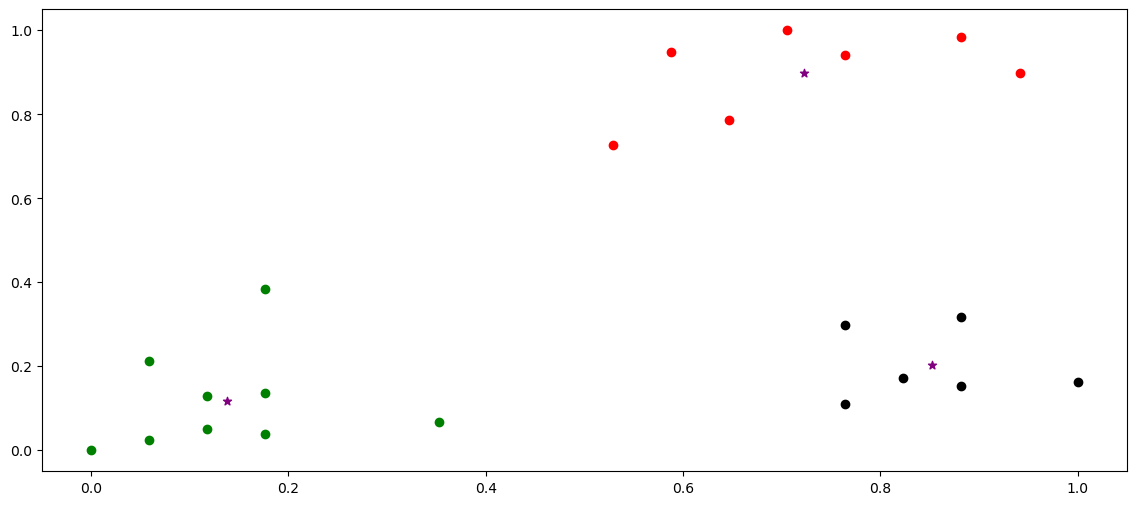

In [51]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]
plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

In [50]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [53]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

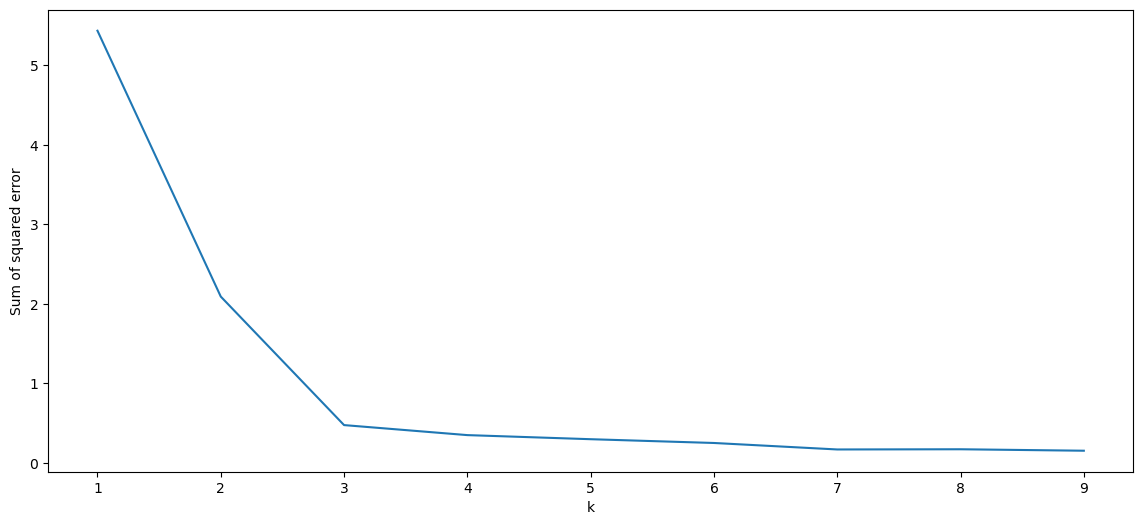

In [54]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

<b> DBSCAN </b>
<ul>
    <li> Density Based Spatial Clustering of Applications With Noise (DBSCAN)</li>
    <li> Clusters are dense regions in the data space, separated by regions of lower density</li>
    <li> DBSCAN is based in this intuitive notion of "clusters" and "noise"</li>
    <li> The key idea is that for each point of a cluster, the neighbourhood of a given radius has to contain at least a given number of points</li>
    <li> Partitioning methods (K-means) and hierarchical clustering work for finding spherical shaped or convex clusters. In other words, they are suitable for compact and well-separated clusters. They are also severely impacted by the presense of noise of outliers</li>
    <li> Real life data can contain clusters of arbitrary shape and can contain noise</li>
</ul>

<b> Parameters required for DBSCAN </b>
<ul>
    <li> <b>eps</b> It defines the neighbourhood around a data point. If the distance between two points is less than or equal to 'eps' then they are considered neighbours. If the eps value if chosen too small then a large part of the data will considered as outliers. One way to find the eps value is based on the k-distance graph.</li>
    <li> <b>MinPts</b> Minimum number of neighbours (data points) with eps radius. The larger the dataset, the larger the value of MinPts should be. As a general rule, the minimum MinPts can ve derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value must be at last 3.</li>
</ul>

<ul>
    <li> In this algorithm there are 3 types of data points</li>
    <li> <b>Core Point</b> A point is a core point if is has more than MinPts within eps</li>
    <li> <b> Border Point </b> A point which has fewer than MinPts within eps but is in the neighbourhood of a core point</li>
    <li> <b> Noise or outlier </b> A point that is not a core point or a border point</li>
</ul>

<ul> 
    <li><b> Steps for DBSCAN Clustering Algorithm</b></li>
    <li> Find all the points within eps and identify the core points with than MinPts neighbours</li>
    <li> For each core point if it is not already assigned to a cluster assign them to the same cluster as the core point</li>
    <li> Recursively find all connected points and assign them to the same cluster as the core points. A point a and b are said to the connected if there exists a point c which has a sufficient number of points in its neighbourhood and both points a and b are with eps distance. This is chaining process. So if b is a neighbour of , c is neighbour of d, and d is a neighbour of e, which in turn is a neighbour of a then b is a neighbour of a</li>
    <li> Iterate through the remaining points. Points that don't belong to a cluster are noise</li>
</ul>


<ul>
    <li><b> Pseudo code for DBSCAN </b></li>
    <li>DBSCAN(dataset, eps, MinPts)</li>
    <li> C = 1</li>
    <li> for each unvisited point p in data set {</li>
    <li>      mark p as visited</li>
    <li>      # find neighbours</li>
    <li>      Neighbours N = find neighbouring points of p</li>
    <li>      if |N| >= MinPts:</li>
    <li>           N = N U N'</li>
    <li>           if p' is not a member if any cluster:</li>
    <li>                 add p' t cluster C</li>
    <li>}</li>
    
</ul>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

In [3]:
X


array([[ 1.03992529,  1.92991009],
       [-1.38609104,  7.48059603],
       [ 1.12538917,  4.96698028],
       [-1.05688956,  7.81833888],
       [ 1.4020041 ,  1.726729  ],
       [ 3.20722587,  0.36765575],
       [-1.76133611,  1.81716162],
       [ 1.34081536,  4.36827878],
       [-0.37881944,  8.33265721],
       [-0.80062564,  8.52294205],
       [-1.68146124,  2.80114893],
       [-2.43304923,  8.26748617],
       [ 1.19820169,  4.47062449],
       [-2.06457304,  7.05157615],
       [ 1.55515985,  0.12527811],
       [ 0.5408715 ,  4.0143625 ],
       [ 1.05374379,  4.49286859],
       [ 2.48368283,  0.57215086],
       [-1.14357242,  3.09602867],
       [-1.15330985,  2.32340978],
       [ 2.60509732,  1.22529553],
       [ 1.82346953,  1.1384044 ],
       [ 0.77468161,  4.91500986],
       [-1.91821859,  2.86268761],
       [-1.85305081,  2.65728761],
       [-0.30022483,  4.63059663],
       [ 1.7571105 ,  0.87138001],
       [ 0.65834704,  4.64200397],
       [-2.65468613,

In [4]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

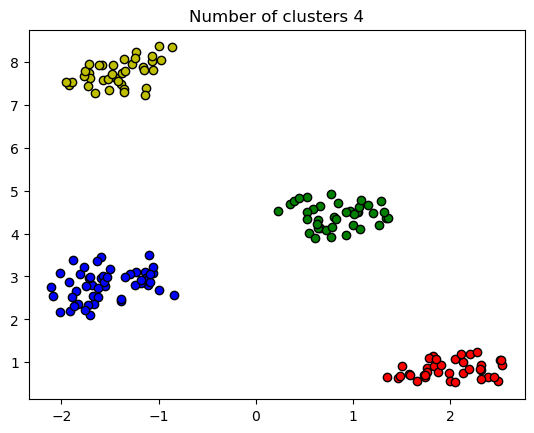

In [23]:
db = DBSCAN(eps=0.3, min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#Number of clusters in labels, ignoring noise if it is present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#Plot result
# Black will be used for noise
unique_labels = set(labels)
colours = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colours):
    if k == -1:
        #Black used for noise
        col = 'k'

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = col, markeredgecolor='k', markersize = 6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = col, markeredgecolor='k', markersize = 6)

plt.title(f"Number of clusters {n_clusters}")
plt.show()



In [18]:
n_clusters

4